<a href="https://colab.research.google.com/github/Deba951/Hyperspectral_Image_Analysis_Learning/blob/main/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This tutorial focuses on:
    1 Introduction
    2 How to download HSI
    3 Reading hyperspectral image
    4 Visualizing the bands of the Hyperspectral image
    5 Visualizing ground truth of the image.
    6 Extracting pixels of the HSI
    7 Visualizing spectral signatures

## Libraries Used:
    scipy
    numpy
    matplotlib

## 1. Introduction

In [14]:
from IPython.display import HTML

# HTML('''<h5>See the below video which give a brief introduction on hyperspectral imaging.</h5><p>Credit- SPECIM</p></br>
#         <center><iframe width="920" height="420"src="https://www.youtube-nocookie.com/embed/_sUZ96YZOQU"
#         frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture"
#         allowfullscreen></iframe></center>''')

## 2. How to download Hyperspectral images

!wget " " command is used to download from a link.

In [15]:
!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"
!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"

# ADD MANUALLY IF NOT WORKS AND COMMENT THEM OUT

In [16]:
!ls

Indian_pines_corrected.mat  Indian_pines_gt.mat  sample_data


### Indian_pines_corrected.mat - The data set in .mat format

### Indian_pines_gt.mat - The ground truth of the dataset in .mat format

## 3. Reading hyperspectral image

In [17]:
## Importing Library.
from scipy.io import loadmat

In [18]:
## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [19]:
#The dimensions of the data.
print(f'Dataset: {dataset.shape}\nGround Truth: {ground_truth.shape}')

Dataset: (145, 145, 200)
Ground Truth: (145, 145)


## 4. Visualizing the bands of the Hyperspectral image

In [20]:
# The total number of the bands in the indian pines dataset is 200.
# The below function plots the bands of the data.

import numpy as np
import matplotlib.pyplot as plt

def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()

The function `plot_band` takes a 3D numpy array as input and plots a random band of the array. The function first creates a figure with a size of 8 by 6 inches. Then, it randomly selects a band number from 0 to the number of bands in the array. Next, it uses the `imshow` function to plot the selected band using the `jet` colormap. The `title` function is used to add a title to the plot. The `axis` function is used to turn off the axis ticks and labels. Finally, the `colorbar` function is used to add a colorbar to the plot.
The `plt.figure` function creates a new figure object. The `figsize` parameter specifies the size of the figure in inches. The `plt.imshow` function plots an image. The `dataset[:,:, band_no]` specifies the band to be plotted. The `cmap` parameter specifies the colormap to be used. The `plt.title` function adds a title to the plot. The `plt.axis` function turns off the axis ticks and labels. The `plt.colorbar` function adds a colorbar to the plot.

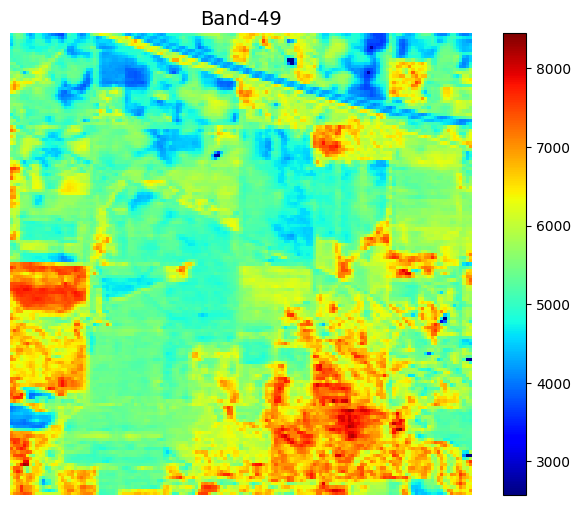

In [21]:
plot_band(dataset)

## 5. Visualizing ground truth of the image.

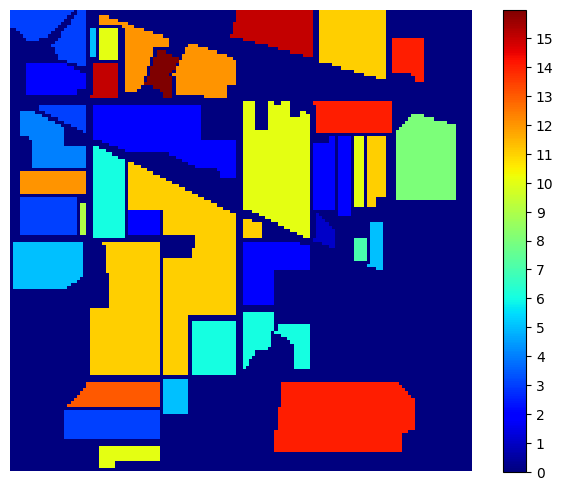

In [22]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

The function `plot_band` takes a 3D numpy array as input and plots a random band of the array. The function first creates a figure with a size of 8 by 6 inches. Then, it randomly selects a band number from 0 to the number of bands in the array. Next, it uses the `imshow` function to plot the selected band using the `jet` colormap. The `title` function is used to add a title to the plot. The `axis` function is used to turn off the axis ticks and labels. Finally, the `colorbar` function is used to add a colorbar to the plot.

## 6. Extracting pixels of the HSI

In [23]:
# The below function is used to extract the pixels and class labels of the hyperspectral image.

!pip install tqdm

In [24]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df

The function `extract_pixels` takes two 3D numpy arrays as input: the dataset and the ground truth. The function first creates an empty pandas DataFrame. Then, it iterates over the bands of the dataset and adds a column to the DataFrame containing the flattened band data. Finally, it adds a column to the DataFrame containing the flattened ground truth data. The function returns the DataFrame.
The `tqdm` library is used to display a progress bar while the function is running.

In [25]:
df = extract_pixels(dataset, ground_truth)

100%|██████████| 200/200 [00:00<00:00, 500.72it/s]


The function `extract_pixels` takes two 3D numpy arrays as input: the dataset and the ground truth. The function first creates an empty pandas DataFrame. Then, it iterates over the bands of the dataset and adds a column to the DataFrame containing the flattened band data. Finally, it adds a column to the DataFrame containing the flattened ground truth data. The function returns the DataFrame.

In [26]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


## 7. Visualizing spectral signatures

In [27]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 201), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()

The function `plot_signature` takes a pandas DataFrame as input and plots the signature of a random pixel. The signature is a plot of the pixel intensity values for each band. The function first creates a figure with a size of 12 by 6 inches. Then, it randomly selects a pixel from the DataFrame and plots its signature. The plot is labeled with the pixel number and the class label. The function also adds a title and axis labels to the plot.


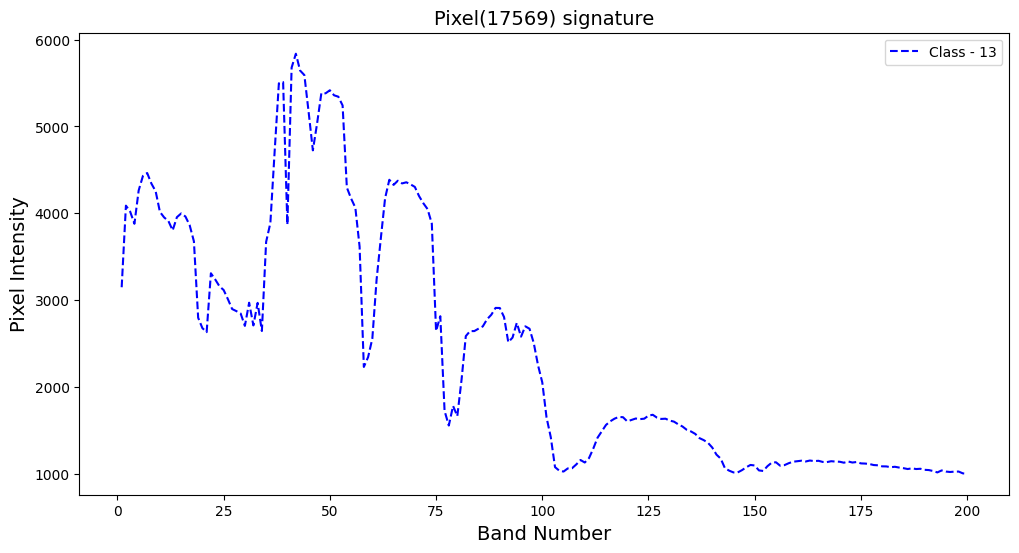

In [28]:
plot_signature(df)